##### The purpose of this script was to re-run this exercise with a reduced scope of mettrics that were used in the final analysis that focused on Olist's order fulfillment process.

# Table of Contents

### 1. Importing libraries and data

### 2. Exploring relationships
        Correlations
        Scatterplots
        Line plots
        Categorical plots

### 3. Re-visiting key questions

## 1. Importing libraries and data

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [34]:
# Define path
path = r'C:\Users\radav\OneDrive\Documents\Career Foundry\Data Analytics\Immersion\Achievement 6 Advanced Analytics and Dashboard Design\Olist'

In [35]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'delivered_orders_location.csv'), index_col=[0])

## 2. Exploring relationships

#### i) Prepare data for exploratory visual analysis

In [36]:
# Check imported data
df.shape

(95287, 20)

In [37]:
df.head()

,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days,late_delivery,geolocation_zip_code_prefix,geolocation_state,state_name,region
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,5.0,72.19,7,6,1,8,0,28013,RJ,Rio de Janeiro,SE
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,4.0,259.83,16,8,8,2,0,15775,SP,Sao Paulo,SE
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,5.0,216.87,7,1,6,13,0,35661,MG,Minas Gerais,SE
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4.0,25.78,6,2,4,5,0,12952,SP,Sao Paulo,SE
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,5.0,218.04,25,11,13,15,0,13226,SP,Sao Paulo,SE


In [38]:
# Remove columns not suited for visual analysis
sub = df[['review_score','payment_value','act_delivery_days','seller_delivery_days','carrier_delivery_days','est_less_act_delivery_days']]

In [39]:
sub.head()

,review_score,payment_value,act_delivery_days,seller_delivery_days,carrier_delivery_days,est_less_act_delivery_days
0,5.0,72.19,7,6,1,8
1,4.0,259.83,16,8,8,2
2,5.0,216.87,7,1,6,13
3,4.0,25.78,6,2,4,5
4,5.0,218.04,25,11,13,15


#### ii) Create a correlation matrix heatmap

Text(0.5, 1.0, 'Olist Correlation Heatmap')

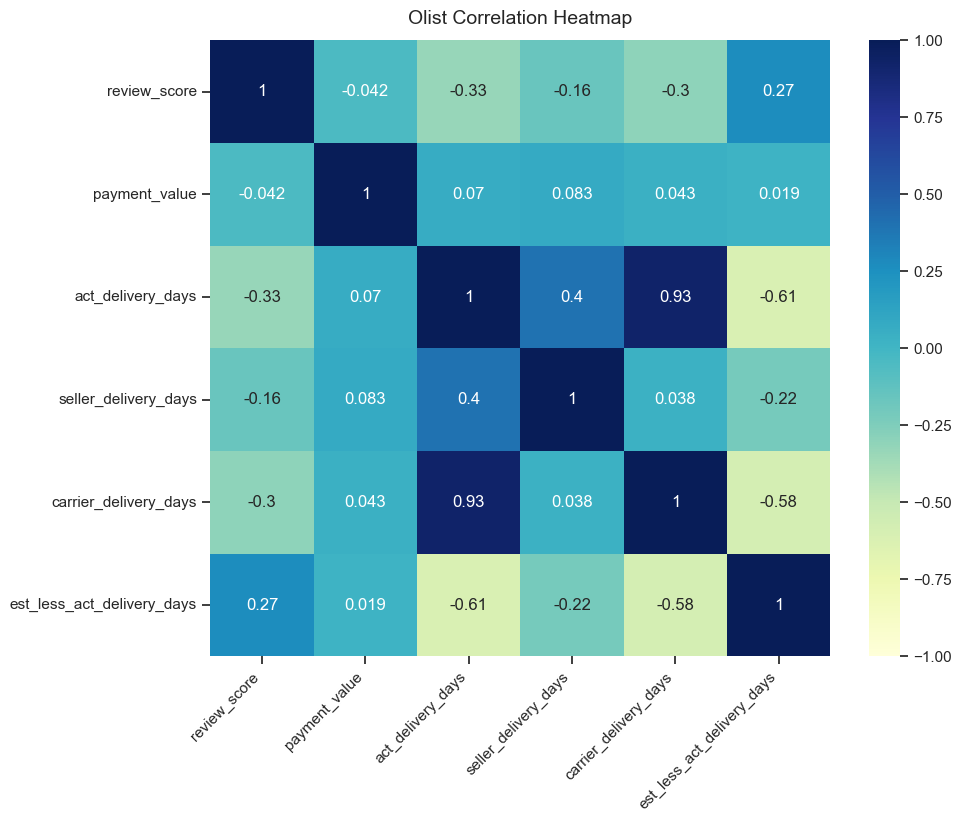

In [40]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,8))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), vmin=-1, vmax=1, annot = True, cmap = 'YlGnBu') # change legend range and color palette
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right') # change alignment of tick labels
corr.set_title('Olist Correlation Heatmap', fontdict={'fontsize':14}, pad=12) # add heading

##### Key observations on the plot coefficients:
1. Customer review scores have a moderate negative correlation with actual delivery days (-0.33). The negative relationship between the variables is expected as customers are likely to be happy and give a higher review score if their product order arrives in less days. However, the moderate coefficient indicates that there are likely other factors besides delivery speed that impacts Olist customer satisfaction. 
2. Customer review scores have a moderate positive correlation with estimated less actual delivery days (0.27). This indicates that customers are more likely to be satisfied the earlier their delivery is received compared to the estimated delivery date. The moderate coefficient reinforces the previous observation that delivery speed is not the only factor that appears to influence customer satisfaction. 
3. Actual delivery days have a very high correlation with carrier delivery days (0.93). This suggests that the time it takes from order approval to customer delivery is mostly comprised of the time taken for the logistics partner to ship the product as opposed to time taken by the seller to prepare the product for shipment.

In [41]:
# Export heatmap
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_Olist.png'), dpi=300, bbox_inches='tight')

#### iii) Create scatterplots for the variables with the strongest correlations

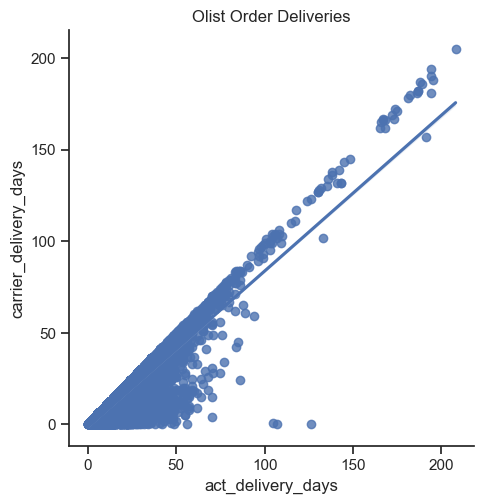

In [42]:
# Create a scatterplot for the 'act_delivery_days' and 'carrier_delivery_days' columns in seaborn
scatter = sns.lmplot(x = 'act_delivery_days', y = 'carrier_delivery_days', data = df).set(title = 'Olist Order Deliveries')

In [43]:
# Export scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Act_vs_Carrier_Delivery_Days.png'))

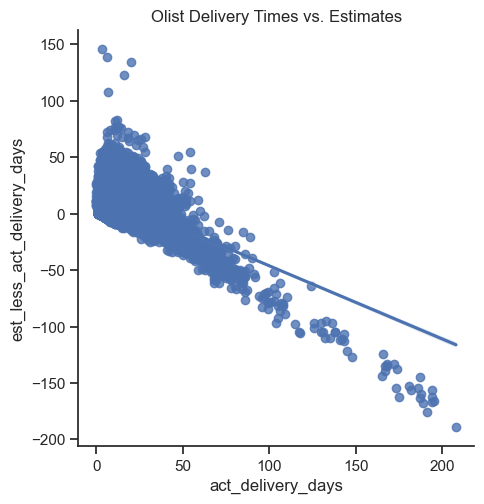

In [44]:
# Create a scatterplot for the 'act_delivery_days' and 'est_less_act_delivery_days' columns in seaborn
scatter2 = sns.lmplot(x = 'act_delivery_days', y = 'est_less_act_delivery_days', data = df).set(title = 'Olist Delivery Times vs. Estimates')

In [45]:
# Export scatterplot
scatter2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Delivery_Times_vs_Estimates.png'))

##### Key observations on the scatterplots:
1. Olist Order Deliveries
    - The steep upward trend line and tightness of most observations around the trendline indicates strong similarity between actual delivery days and carrier delivery days.
2. Olist Delivery Times vs. Estimates
    - The downward slope indicates a negative relationship between actual delivery times and the difference between actual and estimated delivery times. This makes sense, as the shorter the actual delivery time, the longer the time an order should be ahead of estimate.
    - The scatterplot is also very helpful in identifying that many orders are delivered late since estimated less actual delivery time is a negative number. The concentration of late deliveries is ion the 0-90 day range, but there are also dozens of orders in the 3-7 month late range.


#### iv) Create a pair plot

In [46]:
# Reduce the number of variables for ease of understanding
sub_2 = sub[['review_score','payment_value','act_delivery_days','carrier_delivery_days','est_less_act_delivery_days']]

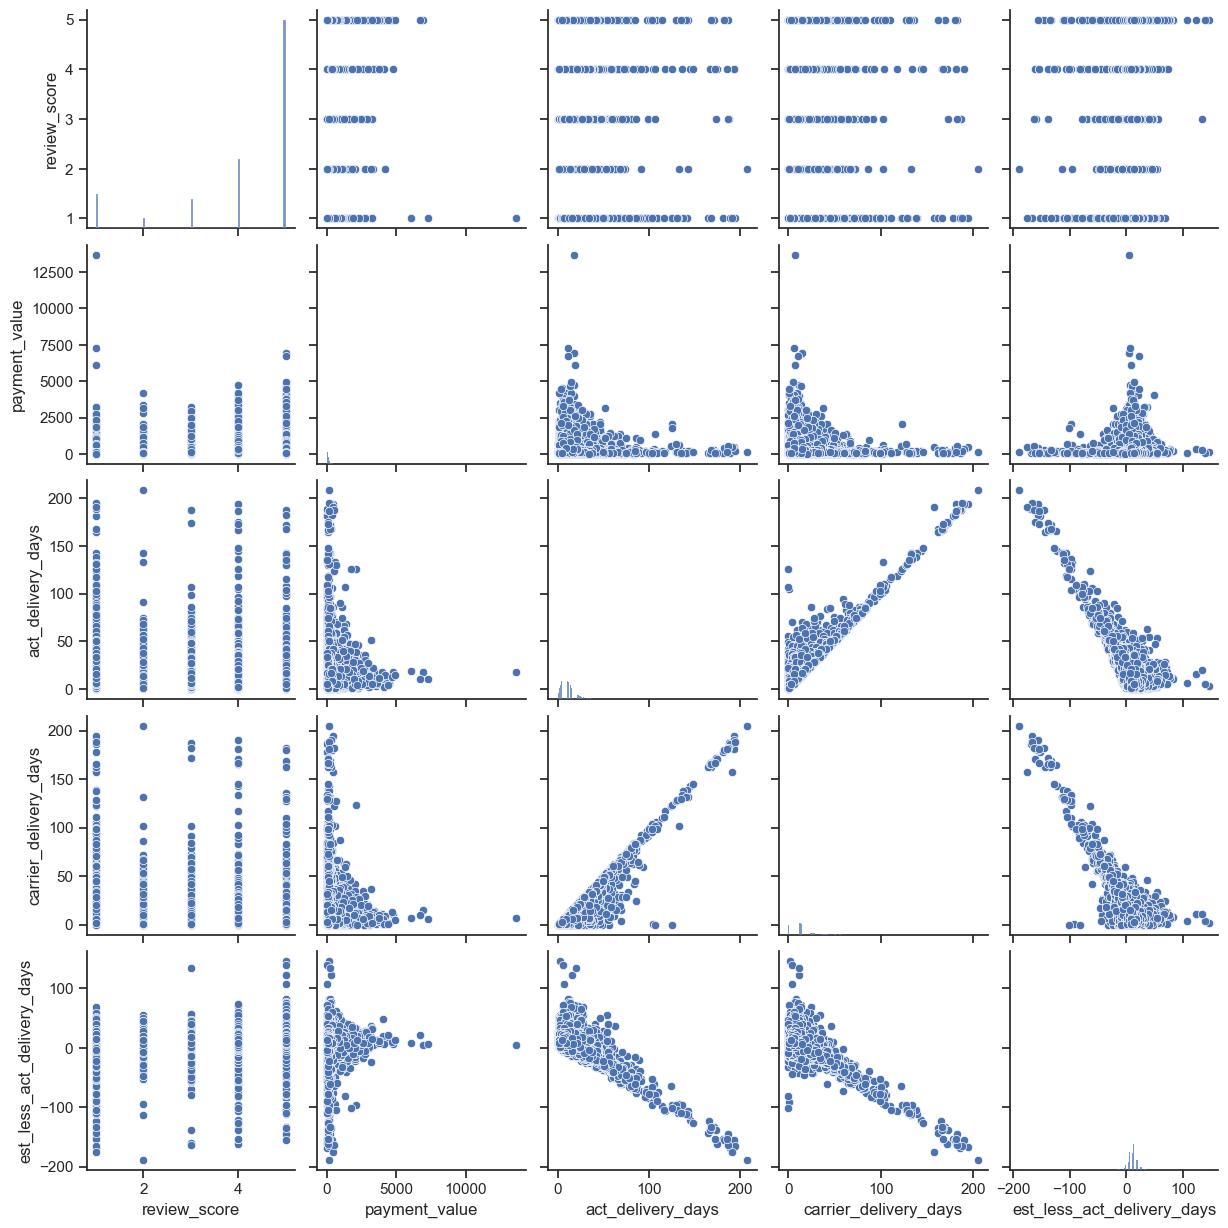

In [47]:
# Create a pair plot 
pp = sns.pairplot(sub_2)

In [48]:
# Export pair plot
pp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Olist Orders Pair Plot.png'))

##### Comments on the distributions of variables:
1. review_score: although the majority of orders have the highest customer satisfaction rating of '5', it is interesting that a significant number have the lowest '1' rating (3rd most populous category).
2. payment_value: it looks like there is one outlier with a very high value that may need removing from the dataset as it distorts the histogram.
3. actual_delivery_days: the vast majoity of orders are delivered to customers within 90 days from order approval, but there are orders that have taken up to 7 months.
4. carrier_delivery_days: similar distribution to actual_delivery_days, as expected given the strong positive correlation between the two variables.
5. est_less_act_delivery_days: most orders are delivered ahead of estimated delivery time, but there are also some orders that don't meet expectations. The histogram would benefit from removal of outliers.
#### I'd like to explore the review_score further to understand what factors customers are dissatisfied with. I'd also like to analyze the delivery times further to have a clearer picture of whether late deliveries are caused by delays by sellers or carriers so that the root cause can be addressed. 

#### v) Create a categorical plot

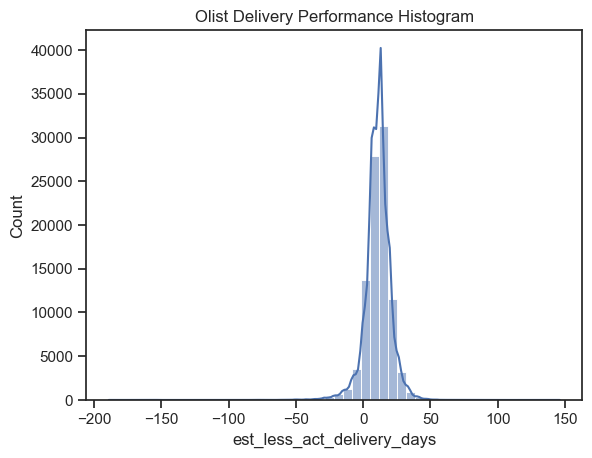

In [49]:
# Use a histogram to visualize the distribution of the 'est_less_act_delivery_days'
hp = sns.histplot(df['est_less_act_delivery_days'], bins = 50, kde = True).set(title = 'Olist Delivery Performance Histogram')

In [50]:
# Set delivery performance categories
df.loc[df['est_less_act_delivery_days'] < 0, 'delivery_outcome'] = 'Late delivery'

In [51]:
df.loc[(df['est_less_act_delivery_days'] >= 0) & (df['est_less_act_delivery_days'] < 15), 'delivery_outcome'] = 'On-time delivery'

In [52]:
df.loc[df['est_less_act_delivery_days'] >= 15, 'delivery_outcome'] = 'Fast delivery'

In [53]:
# Check value counts of 'delivery_outcome' category
df['delivery_outcome'].value_counts(dropna = False)

delivery_outcome
On-time delivery    58546
Fast delivery       29096
Late delivery        7645
Name: count, dtype: int64

In [54]:
# Drop records with NaNs
df2 = df.dropna()

In [55]:
# Re-check value counts
df2['delivery_outcome'].value_counts(dropna = False)

delivery_outcome
On-time delivery    58546
Fast delivery       29096
Late delivery        7645
Name: count, dtype: int64

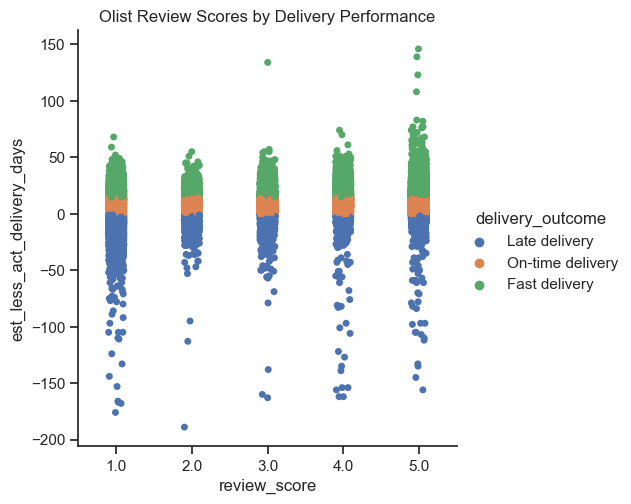

In [56]:
# Create a categorical plot in seaborn using the delivery putcome categories created above
sns.set(style='ticks')
cp = sns.catplot(x='review_score', y='est_less_act_delivery_days', hue='delivery_outcome', data=df2).set(title = 'Olist Review Scores by Delivery Performance')

In [57]:
# Export categorical plot
cp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Olist Categorical Plot.png'), bbox_inches='tight')

##### Interpretation of categorical plot:
1. The higher quantity of blue dots with '5' review scores compared to lower review scores indicate that delivering orders to customers significantly before the original estimated delivery date is likely to contribute to higher customer review scores. Visually, you can see a higher share of blue dots than green dots in the '5' review score column.
2. Conversely, there is a higher share of green dots than blue dots in the '1' review score column, indicating that a late delivery is likely to contribute to a lower customer satisfaction score.
3. On-time deliveries appear to have review scores that are evenly spread, suggesting that other factors are influencing the customer satisfaction scores.

## 3. Re-visiting key questions

#### Key questions from the previous task:
##### Order Fulfilment Performance
1. Is there a correlation between delivery time and customer satisfaction? There does appear to be some correlation between delivery time and customer review score variables, but it is only moderate at around -0.3. The faster an order is delivered, the more likely the customer will give a higher review score about their Olist order experience. However, the only modest correlation indicates that other factors besides delivery time are influencing customer review scores.

2. Are sellers or logistics partners primarily responsible for late deliveries? Since the exploratoy analysis showed a very high level of positive correlation between actual delivery times and logistics partner/carries delivery times, this suggests that the carrier performance primarily determines the overall delivery time, whether positive or negative. There is a much lower correlation between actual delivery times and logistics partner/carries delivery times and seller delivery times, indicating that time taken by the seller to make products available is not a major factor in overall delivery timelines.

3. Which sellers are low performers in terms of late deliveries? Seller id data needs to be added to the dataset in subsequent analysis to answer this question.

4. Are there specific regions or product categories with much higher frequency of late deliveries? Regional and product category data needs to be added to the dataset in subsequent analysis to answer this question.

5. What are the trends in delivery performance over time? Time-series analysis needs to be conducted to answer this question.

#### Hypotheses to be tested later in the project:
   Carriers, not sellers, are primarily responsible for Olist orders delivered late.

